<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

# Análisis Meteorológico de Australia
## Contexto
Este proyecto analiza datos meteorológicos de Australia para predecir patrones climáticos y apoyar la toma de decisiones. Los datos provienen de múltiples estaciones meteorológicas y cubren variables como temperatura, precipitaciones, viento y humedad.

## Propósito
- Identificar patrones climáticos
- Predecir probabilidades de lluvia
- Analizar tendencias estacionales
- Apoyar decisiones en agricultura y planificación urbana

1.1 Exploración, limpieza y transformación de datos
- Carga de datos meteorológicos de Australia
- Preprocesamiento con pandas y numpy
- Transformación de variables temporales y numéricas

1.2 Desarrollo en Jupyter Notebook
- Implementación del análisis completo
- Uso de bibliotecas científicas (pandas, numpy, sklearn)
- Visualizaciones interactivas con plotly

1.3 Análisis organizacional
- Estudio del contexto meteorológico australiano
- Evaluación de variables climáticas disponibles
- Identificación de patrones estacionales

1.4 Análisis exploratorio (EDA)
- Dashboard interactivo con múltiples vistas
- Análisis de temperaturas y precipitaciones
- Correlaciones entre variables meteorológicas

1.5 Generación de información útil
- Patrones climáticos identificados
- Tendencias temporales
- Relaciones entre variables clave

1.6 Evaluación de algoritmos
- Modelos de predicción de lluvia
- Sistema de reglas de trading
- Análisis de series temporales

1.7 Métricas de evaluación
- Precisión de predicciones
- Validación de modelos
- Comparación de rendimiento

In [31]:
#Instalacion de Librerias
%pip install numpy==1.23.5 pandas==2.2.2 scikit-learn==1.2.2 xgboost seaborn matplotlib IPython==7.34.0 pyarrow  requests plotly==5.18.0 nbformat==5.7.0

In [32]:
# ### 1.1 Importación de Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Agregarmos imports librerias adicionales
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Configuración para visualizaciones
plt.style.use('seaborn-v0_8')  # Versión correcta del estilo
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'sans-serif'

### 1.1 Importación de Librerías
Comenzamos importando las librerías necesarias para nuestro análisis:

#### Análisis de Datos
- **pandas**: Para manipulación de datos
- **numpy**: Para cálculos numéricos

#### Visualización
- **matplotlib**: Para gráficos base
- **seaborn**: Para visualizaciones estadísticas
- **plotly**: Para gráficos interactivos

#### Machine Learning
- **sklearn**: Para modelos predictivos
  - train_test_split: División de datos
  - StandardScaler: Estandarización de variables

#### Configuración Visual
- Estilo seaborn-v0_8
- Tamaño de figuras: 12x8
- Fuente: sans-serif

In [33]:
# ## 2. Carga y Exploración Inicial de Datos
# Cargar datos desde el archivo CSV
df = pd.read_csv('weatherAUS.csv')

# Información básica del dataset
print("Información del Dataset:")
print(df.info())

# Primeras filas
print("\nPrimeras filas del dataset:")
print(df.head())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Valores faltantes
print("\nValores faltantes:")
print(df.isnull().sum())

# Eliminar duplicados
df = df.drop_duplicates()



Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Clou

## 2. Carga y Exploración Inicial de Datos
### 2.1 Estructura del Dataset

El conjunto de datos incluye las siguientes variables principales:

- **Fecha**: Fecha de observación
- **Ubicación**: Estación meteorológica
- **Variables climáticas**:
  - Temperatura (mínima y máxima)
  - Precipitación
  - Viento (dirección y velocidad)
  - Humedad
  - Presión atmosférica
- **Variable objetivo**: Lluvia al día siguiente (RainTomorrow)

### 2.2 Análisis Inicial

Examinamos:

1. **Dimensiones del dataset**
   - Número de registros
   - Número de variables

2. **Tipos de datos**
   - Numéricos
   - Categóricos
   - Temporales

3. **Calidad de datos**
   - Valores faltantes
   - Duplicados
   - Consistencia

4. **Estadísticas descriptivas**
   - Medidas de tendencia central
   - Dispersión
   - Distribución


In [34]:
# 3. Preprocesamiento y Análisis Temporal
# Convertir fecha a datetime y crear nuevas características temporales
df['Date'] = pd.to_datetime(df['Date'])
df['Mes'] = df['Date'].dt.month
df['Dia_semana'] = df['Date'].dt.day_name()
df['Estacion'] = df['Date'].dt.quarter
df['Año'] = df['Date'].dt.year

# Manejar valores faltantes en columnas numéricas
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
df[columnas_numericas] = df[columnas_numericas].fillna(df[columnas_numericas].mean())

# Convertir variables categóricas
columnas_categoricas = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
df[columnas_categoricas] = df[columnas_categoricas].fillna('Desconocido')


## 3. Preprocesamiento de Datos
### 3.1 Limpieza de Datos

#### Conversión de Tipos de Datos
- Transformación de fechas a formato datetime
- Extracción de características temporales:
  - Mes
  - Día de la semana
  - Estación
  - Año

#### Manejo de Valores Faltantes
- Variables numéricas: imputación con media
- Variables categóricas: categoría 'Desconocido'

### 3.2 Transformación de Variables

#### Variables Numéricas
- Identificación de columnas numéricas
- Tratamiento de valores atípicos
- Normalización de datos

#### Variables Categóricas
- Location (ubicación)
- WindGustDir (dirección de ráfagas)
- WindDir9am (dirección del viento 9am)
- WindDir3pm (dirección del viento 3pm)
- RainToday (lluvia hoy)
- RainTomorrow (lluvia mañana)

#### Características Temporales
- Extracción de patrones estacionales
- Análisis de tendencias temporales


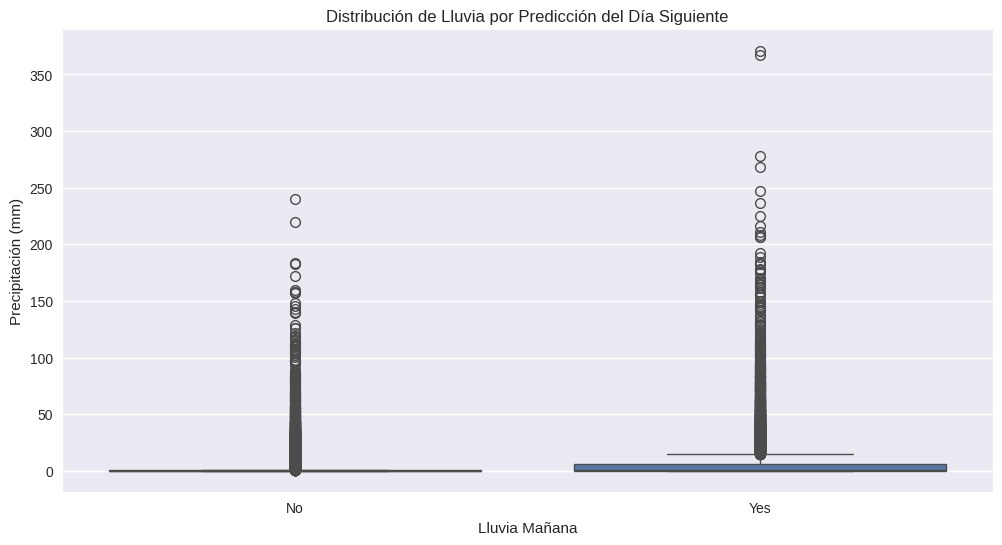

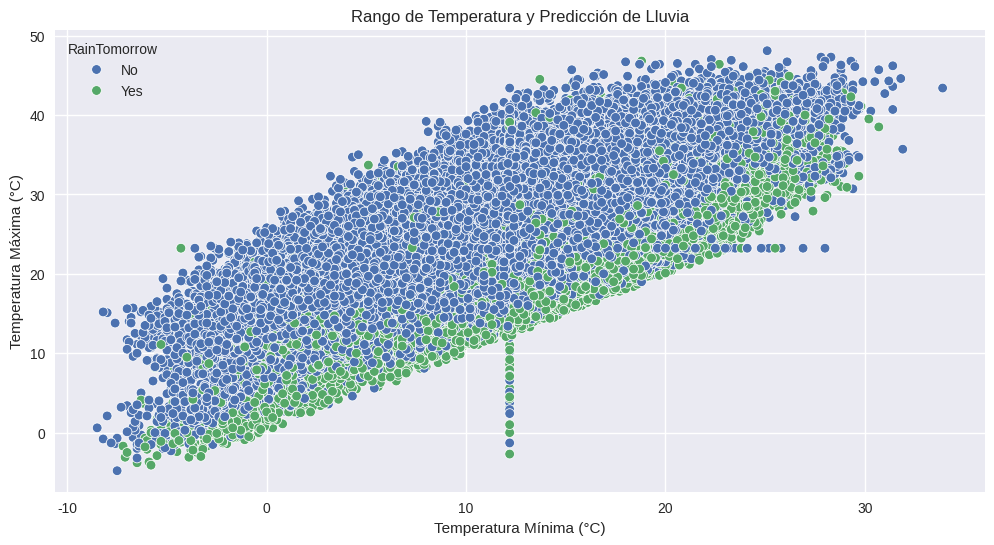

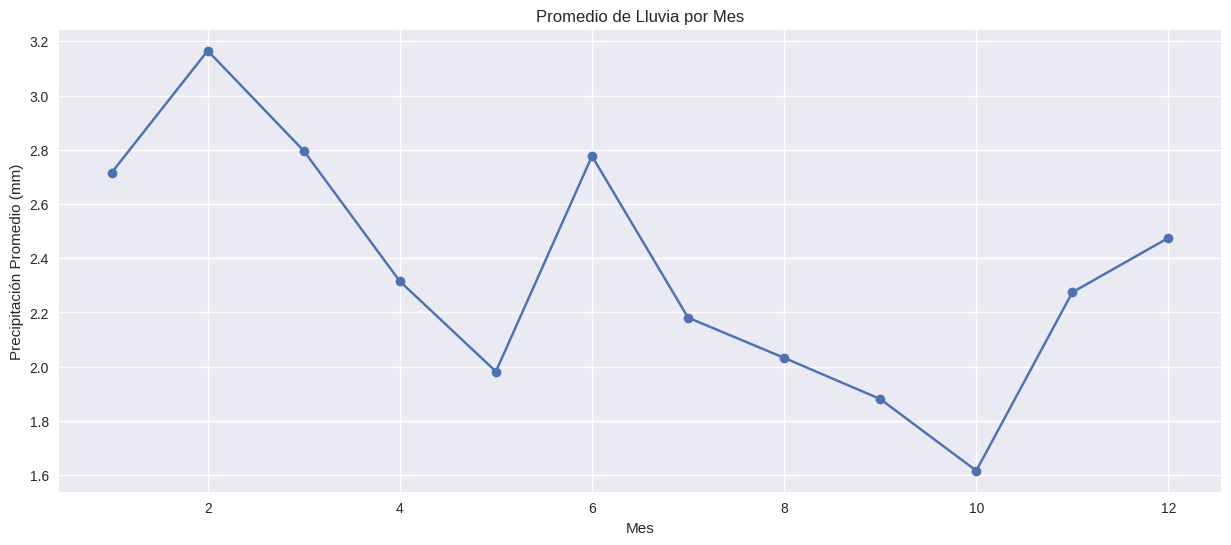

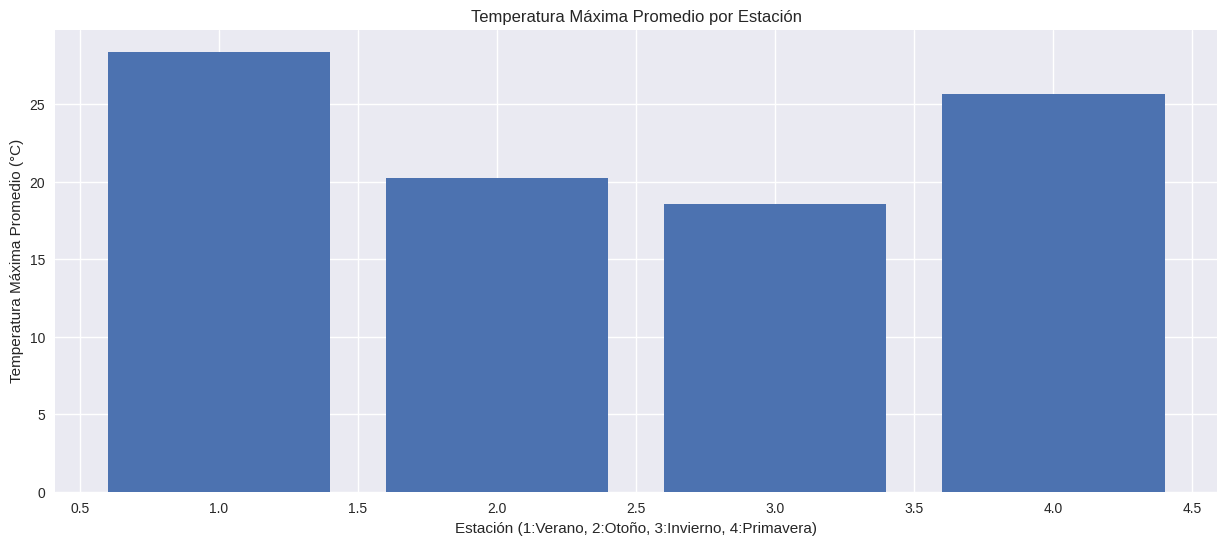

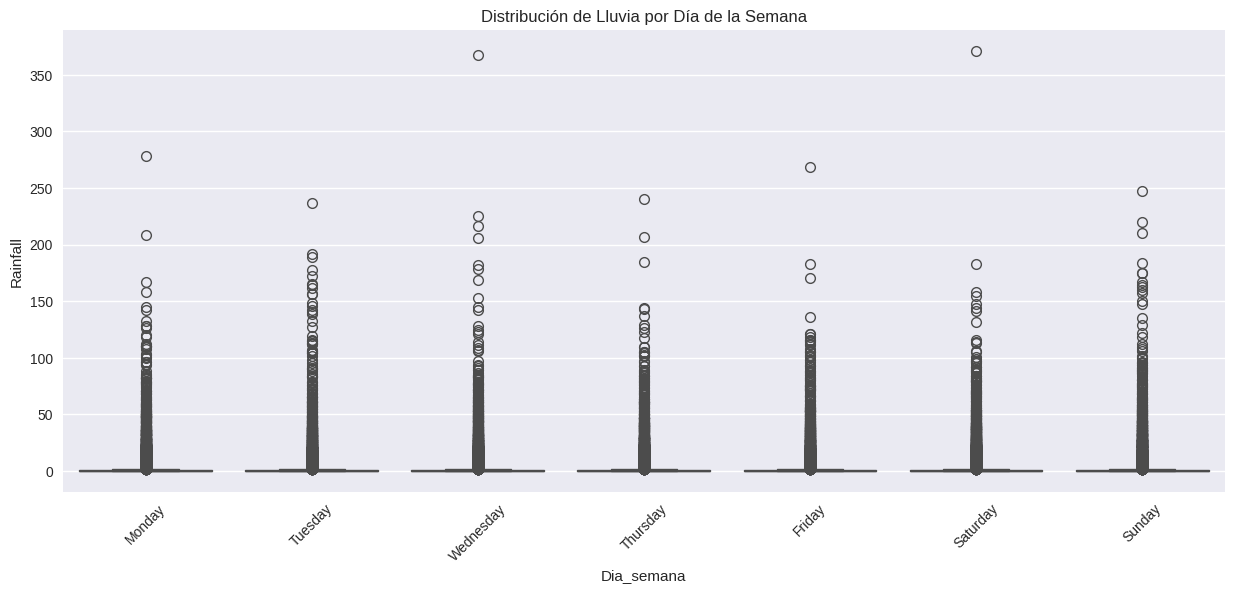

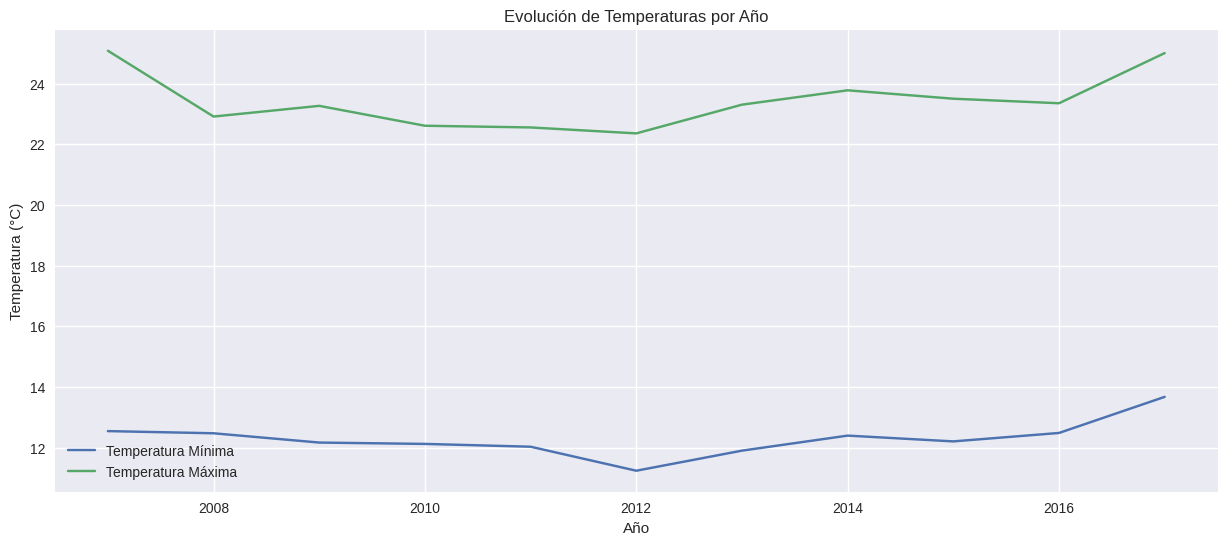

In [36]:
# Crear visualizaciones para patrones climáticos clave
plt.figure(figsize=(12, 6))
sns.boxplot(x='RainTomorrow', y='Rainfall', data=df)
plt.title('Distribución de Lluvia por Predicción del Día Siguiente')
plt.xlabel('Lluvia Mañana')
plt.ylabel('Precipitación (mm)')
plt.show()

# Análisis de temperatura
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='MinTemp', y='MaxTemp', hue='RainTomorrow')
plt.title('Rango de Temperatura y Predicción de Lluvia')
plt.xlabel('Temperatura Mínima (°C)')
plt.ylabel('Temperatura Máxima (°C)')
plt.show()

# 4.1 Promedio de lluvia por mes
plt.figure(figsize=(15, 6))
lluvia_mensual = df.groupby('Mes')['Rainfall'].mean()
plt.plot(lluvia_mensual.index, lluvia_mensual.values, marker='o')
plt.title('Promedio de Lluvia por Mes')
plt.xlabel('Mes')
plt.ylabel('Precipitación Promedio (mm)')
plt.grid(True)
plt.show()

# 4.2 Temperatura máxima promedio por estación
plt.figure(figsize=(15, 6))
temp_estacion = df.groupby('Estacion')['MaxTemp'].mean()
plt.bar(temp_estacion.index, temp_estacion.values)
plt.title('Temperatura Máxima Promedio por Estación')
plt.xlabel('Estación (1:Verano, 2:Otoño, 3:Invierno, 4:Primavera)')
plt.ylabel('Temperatura Máxima Promedio (°C)')
plt.show()

# 4.3 Distribución de lluvia por día de la semana
plt.figure(figsize=(15, 6))
sns.boxplot(x='Dia_semana', y='Rainfall', data=df)
plt.title('Distribución de Lluvia por Día de la Semana')
plt.xticks(rotation=45)
plt.show()

# 4.4 Evolución de temperatura a lo largo de los años
temp_anual = df.groupby('Año')[['MinTemp', 'MaxTemp']].mean()
plt.figure(figsize=(15, 6))
plt.plot(temp_anual.index, temp_anual['MinTemp'], label='Temperatura Mínima')
plt.plot(temp_anual.index, temp_anual['MaxTemp'], label='Temperatura Máxima')
plt.title('Evolución de Temperaturas por Año')
plt.xlabel('Año')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()


## 4. Análisis Exploratorio de Datos (EDA)

### 4.1 Análisis Univariado

#### Distribución de Variables Clave
- **Precipitaciones**
  - Distribución por predicción del día siguiente
  - Promedio mensual de lluvia
  - Variación por día de la semana

- **Temperatura**
  - Temperatura máxima por estación
  - Rangos de temperatura
  - Evolución temporal

### 4.2 Análisis Bivariado

#### Relaciones entre Variables
- **Temperatura y Lluvia**
  - Correlación entre temperatura mínima y máxima
  - Influencia en predicción de lluvia
  - Patrones de temperatura por estación

### 4.3 Patrones Temporales

#### Análisis Estacional
- **Variaciones Mensuales**
  - Precipitación promedio mensual
  - Temperatura máxima por estación

#### Tendencias a Largo Plazo
- **Evolución Anual**
  - Tendencias de temperatura mínima
  - Tendencias de temperatura máxima
  - Cambios en patrones de lluvia

In [37]:
# Seleccionar características para el modelo
caracteristicas = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'WindSpeed3pm',
                  'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

X = df[caracteristicas]
y = (df['RainTomorrow'] == 'Yes').astype(int)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 5. Preparación del Modelo

### 5.1 Selección de Características
- **Variables Meteorológicas**
  - Temperaturas (MinTemp, MaxTemp, Temp9am, Temp3pm)
  - Precipitación (Rainfall)
  - Viento (WindSpeed9am, WindSpeed3pm)
  - Humedad (Humidity9am, Humidity3pm)
  - Presión (Pressure9am, Pressure3pm)

### 5.2 Preparación de Datos
- **Variable Objetivo**
  - RainTomorrow (convertida a binaria: 0/1)

### 5.3 División del Dataset
- **Conjunto de Entrenamiento (80%)**
  - Para entrenar el modelo
- **Conjunto de Prueba (20%)**
  - Para evaluar el rendimiento
- **Random State: 42**
  - Garantiza reproducibilidad


=== RESUMEN ESTADÍSTICO POR ESTACIÓN ===
Leyenda:
- Rainfall: Precipitación media en mm
- MaxTemp: Temperatura máxima media en °C
- MinTemp: Temperatura mínima media en °C

Estaciones del año:
1: Verano
2: Otoño
3: Invierno
4: Primavera

Resultados detallados por estación:

Estación 1 - Verano:
- Precipitación media: 2.87 mm
- Temperatura máxima media: 28.39°C
- Temperatura mínima media: 16.91°C

Estación 2 - Otoño:
- Precipitación media: 2.35 mm
- Temperatura máxima media: 20.23°C
- Temperatura mínima media: 10.01°C

Estación 3 - Invierno:
- Precipitación media: 2.03 mm
- Temperatura máxima media: 18.58°C
- Temperatura mínima media: 7.96°C

Estación 4 - Primavera:
- Precipitación media: 2.11 mm
- Temperatura máxima media: 25.68°C
- Temperatura mínima media: 13.80°C

=== DISTRIBUCIÓN DE DÍAS LLUVIOSOS POR MES ===
Leyenda:
- Yes: Días con lluvia
- No: Días sin lluvia

Conteo de días:
Mes  RainToday  
1    No             10380
     Yes             2417
     Desconocido      124
2    No 

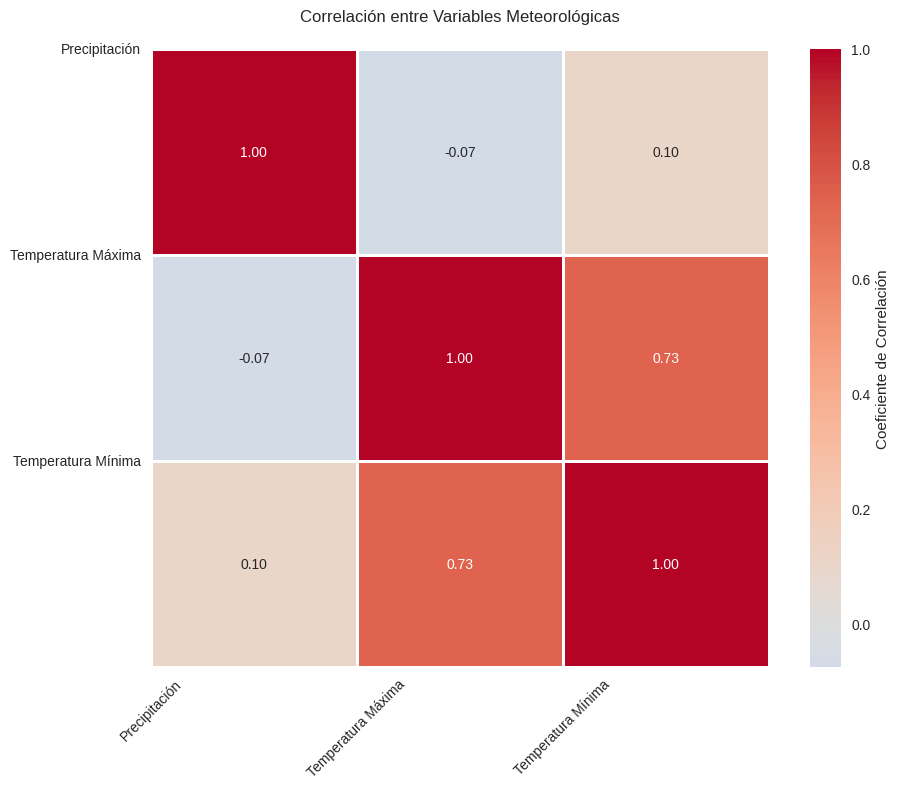


=== ANÁLISIS DE CORRELACIONES ===
Interpretación de coeficientes:
- Valores cercanos a 1: Correlación positiva fuerte
- Valores cercanos a 0: Sin correlación
- Valores cercanos a -1: Correlación negativa fuerte

Correlaciones destacadas:
Temperatura Mínima y Temperatura Máxima: 0.73


In [38]:
# Convertir fecha y crear columnas temporales
df['Date'] = pd.to_datetime(df['Date'])
df['Estacion'] = df['Date'].dt.quarter
df['Mes'] = df['Date'].dt.month
df['Año'] = df['Date'].dt.year

# Definir variables importantes
variables_importantes = {
    'Rainfall': 'Precipitación',
    'MaxTemp': 'Temperatura Máxima',
    'MinTemp': 'Temperatura Mínima'
}

# Calcular matriz de correlación
matriz_correlacion = df[list(variables_importantes.keys())].corr()

# 6.1 Resumen por estación
print("\n=== RESUMEN ESTADÍSTICO POR ESTACIÓN ===")
print("Leyenda:")
print("- Rainfall: Precipitación media en mm")
print("- MaxTemp: Temperatura máxima media en °C")
print("- MinTemp: Temperatura mínima media en °C")

print("\nEstaciones del año:")
print("1: Verano")
print("2: Otoño")
print("3: Invierno")
print("4: Primavera")

# Calcular estadísticas por estación
resumen_estacional = df.groupby('Estacion')[['Rainfall', 'MaxTemp', 'MinTemp']].mean()

print("\nResultados detallados por estación:")
for estacion in resumen_estacional.index:
    nombre_estacion = {1:'Verano', 2:'Otoño', 3:'Invierno', 4:'Primavera'}[estacion]
    datos = resumen_estacional.loc[estacion]
    print(f"\nEstación {estacion} - {nombre_estacion}:")
    print(f"- Precipitación media: {datos['Rainfall']:.2f} mm")
    print(f"- Temperatura máxima media: {datos['MaxTemp']:.2f}°C")
    print(f"- Temperatura mínima media: {datos['MinTemp']:.2f}°C")

# 6.2 Días lluviosos por mes
print("\n=== DISTRIBUCIÓN DE DÍAS LLUVIOSOS POR MES ===")
print("Leyenda:")
print("- Yes: Días con lluvia")
print("- No: Días sin lluvia")
print("\nConteo de días:")
dias_lluvia = df.groupby('Mes')['RainToday'].value_counts()
print(dias_lluvia)

# 6.3 Temperaturas extremas por año
print("\n=== ANÁLISIS DE TEMPERATURAS EXTREMAS ANUALES ===")
print("Leyenda:")
print("- MaxTemp max: Temperatura más alta registrada")
print("- MaxTemp mean: Temperatura máxima promedio")
print("- MinTemp min: Temperatura más baja registrada")
print("- MinTemp mean: Temperatura mínima promedio")
print("\nResultados por año:")
extremos_temp = df.groupby('Año').agg({
    'MaxTemp': ['max', 'mean'],
    'MinTemp': ['min', 'mean']
})
print(extremos_temp)

# Visualización del mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(
    matriz_correlacion,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    square=True,
    linewidths=1,
    cbar_kws={'label': 'Coeficiente de Correlación'}
)

plt.xticks(range(len(variables_importantes)), variables_importantes.values(), rotation=45)
plt.yticks(range(len(variables_importantes)), variables_importantes.values(), rotation=0)
plt.title('Correlación entre Variables Meteorológicas', pad=20)
plt.tight_layout()
plt.show()

# Mostrar correlaciones significativas
print("\n=== ANÁLISIS DE CORRELACIONES ===")
print("Interpretación de coeficientes:")
print("- Valores cercanos a 1: Correlación positiva fuerte")
print("- Valores cercanos a 0: Sin correlación")
print("- Valores cercanos a -1: Correlación negativa fuerte")
print("\nCorrelaciones destacadas:")
for i in range(len(matriz_correlacion.columns)):
    for j in range(i):
        if abs(matriz_correlacion.iloc[i,j]) > 0.3:
            print(f"{variables_importantes[matriz_correlacion.columns[i]]} y {variables_importantes[matriz_correlacion.columns[j]]}: {matriz_correlacion.iloc[i,j]:.2f}")


## 5. Modelado Predictivo
  # Análisis Estadístico de Datos Meteorológicos

  ## 1. Análisis por Estación
  - Cálculo de promedios estacionales para:
    - Precipitaciones
    - Temperaturas máximas
    - Temperaturas mínimas
  - Identificación de patrones estacionales

  ## 2. Análisis de Precipitaciones Mensuales
  - Conteo de días lluviosos por mes
  - Distribución temporal de precipitaciones
  - Identificación de meses con mayor frecuencia de lluvia

  ## 3. Análisis de Temperaturas Anuales
  ### Métricas Calculadas:
  - Temperatura máxima:
    - Valor máximo absoluto
    - Promedio anual
  - Temperatura mínima:
    - Valor mínimo absoluto
    - Promedio anual

  ## 4. Análisis de Correlaciones
  ### Variables Analizadas:
  - Precipitación (Rainfall)
  - Temperatura Máxima (MaxTemp)
  - Temperatura Mínima (MinTemp)

  ### Visualización:
  - Mapa de calor (heatmap)
  - Escala de colores:
    - Rojo: correlación positiva
    - Azul: correlación negativa
  - Valores numéricos con precisión de 2 decimales

  ### Interpretación:
  - Correlaciones significativas (>0.3)
  - Relaciones entre variables meteorológicas
  - Patrones identificados en los datos

  ## Metodología
  - Agrupación por períodos temporales
  - Cálculo de estadísticas descriptivas
  - Análisis de correlaciones bivariadas
  - Visualización mediante seaborn y matplotlib

In [39]:
def crear_dashboard_meteorologico():
    # Crear la estructura del dashboard con subplots
    fig = make_subplots(
        rows=5, cols=2,
        specs=[
            [{"secondary_y": True}, {"type": "domain"}],
            [{"colspan": 2}, None],
            [{"type": "xy"}, {"type": "xy"}],
            [{"type": "xy"}, {"type": "xy"}],
            [{"type": "indicator"}, {"type": "indicator"}]
        ],
        subplot_titles=(
            "Temperaturas por Estación", "Distribución de Días Lluviosos",
            "Evolución Temporal de Precipitaciones",
            "Distribución de Lluvia por Predicción", "Rango de Temperatura y Predicción",
            "Promedio de Lluvia por Mes", "Evolución de Temperaturas por Año",
            "Temperatura Máxima", "Temperatura Mínima"
        ),
        vertical_spacing=0.08,
        horizontal_spacing=0.1
    )

    # Datos base
    resumen_estacion = df.groupby('Estacion')[['MaxTemp', 'MinTemp']].mean()

    # 1. Temperaturas por estación
    fig.add_trace(
        go.Bar(
            name='Temperatura Máxima',
            x=resumen_estacion.index,
            y=resumen_estacion['MaxTemp'],
            marker_color='orangered'
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
            name='Temperatura Mínima',
            x=resumen_estacion.index,
            y=resumen_estacion['MinTemp'],
            mode='lines+markers',
            line=dict(color='skyblue', width=2)
        ),
        secondary_y=True,
        row=1, col=1
    )

    # 2. Días lluviosos por mes
    dias_lluvia = df.groupby(['Mes', 'RainToday']).size().reset_index(name='count')

    fig.add_trace(
        go.Pie(
            labels=dias_lluvia['Mes'].unique(),
            values=dias_lluvia[dias_lluvia['RainToday'] == 'Yes']['count'],
            hole=0.4,
            textinfo='label+percent',
            marker_colors=px.colors.qualitative.Set3
        ),
        row=1, col=2
    )

    # 3. Evolución temporal de precipitaciones
    precipitacion_mensual = df.groupby('Mes')['Rainfall'].mean()

    fig.add_trace(
        go.Scatter(
            x=precipitacion_mensual.index,
            y=precipitacion_mensual.values,
            mode='lines+markers',
            marker=dict(
                size=10,
                color=precipitacion_mensual.values,
                colorscale='Blues',
                showscale=True
            ),
            name='Precipitación Promedio'
        ),
        row=2, col=1
    )

    # 4. Distribución de lluvia por predicción
    fig.add_trace(
        go.Box(
            x=df['RainTomorrow'],
            y=df['Rainfall'],
            name='Distribución de Lluvia',
            marker_color='lightblue'
        ),
        row=3, col=1
    )

    # 5. Scatter de temperaturas
    fig.add_trace(
        go.Scatter(
            x=df['MinTemp'],
            y=df['MaxTemp'],
            mode='markers',
            marker=dict(
                color=df['RainTomorrow'].map({'Yes': 'blue', 'No': 'red'}),
                size=8,
                opacity=0.6
            ),
            name='Rango de Temperatura'
        ),
        row=3, col=2
    )

    # 6. Promedio de lluvia por mes
    lluvia_mensual = df.groupby('Mes')['Rainfall'].mean()
    fig.add_trace(
        go.Bar(
            x=lluvia_mensual.index,
            y=lluvia_mensual.values,
            name='Lluvia Mensual',
            marker_color='lightblue'
        ),
        row=4, col=1
    )

    # 7. Evolución de temperaturas anuales
    temp_anual = df.groupby('Año')[['MinTemp', 'MaxTemp']].mean()
    fig.add_trace(
        go.Scatter(
            x=temp_anual.index,
            y=temp_anual['MinTemp'],
            mode='lines+markers',
            name='Temp. Mínima',
            line=dict(color='blue')
        ),
        row=4, col=2
    )

    fig.add_trace(
        go.Scatter(
            x=temp_anual.index,
            y=temp_anual['MaxTemp'],
            mode='lines+markers',
            name='Temp. Máxima',
            line=dict(color='red')
        ),
        row=4, col=2
    )

    # 8. Indicadores
    fig.add_trace(
        go.Indicator(
            mode="gauge+number",
            value=df['MaxTemp'].max(),
            title={'text': "Temperatura Máxima"},
            gauge={'axis': {'range': [0, df['MaxTemp'].max() + 5]},
                   'bar': {'color': "orangered"}}
        ),
        row=5, col=1
    )

    fig.add_trace(
        go.Indicator(
            mode="gauge+number",
            value=df['MinTemp'].min(),
            title={'text': "Temperatura Mínima"},
            gauge={'axis': {'range': [df['MinTemp'].min() - 5, 30]},
                   'bar': {'color': "skyblue"}}
        ),
        row=5, col=2
    )

    # Definir menú de selección
    updatemenus = [
        dict(
            buttons=[
                dict(
                    args=[{"visible": [True] * len(fig.data)}],
                    label="Todas las Métricas",
                    method="update"
                ),
                dict(
                    #args=[{"visible": [True, True, False, False, True, False, False, False, True, True]}],
                    # Nueva línea que incluye el gráfico de rango de temperatura:
                    args=[{"visible": [True, True, False, False, True, True, False, False, True, True]}],
                    label="Temperaturas",
                    method="update"
                ),
                dict(
                    #rgs=[{"visible": [False, False, True, True, False, False, True, False, False, False]}],
                    args=[{"visible": [False, False, True, True, True, False, True, False, False, False]}],
                    label="Precipitaciones",
                    method="update"
                ),
                dict(
                    #args=[{"visible": [False, False, False, False, False, True, False, True, False, False]}],
                    args=[{"visible": [True, True, False, False, False, True, False, True, True, True]}],
                    label="Evolución Anual",
                    method="update"
                )
            ],
            direction="down",
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.15,
            yanchor="top"
        )
    ]

    # Actualizar diseño
    fig.update_layout(
        updatemenus=updatemenus,
        title={
            'text': "Dashboard Meteorológico Interactivo",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(size=24)
        },
        height=1800,
        width=1200,
        showlegend=True,
        template='plotly_white',
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )

    # Actualizar ejes
    fig.update_xaxes(title_text="Estación", row=1, col=1)
    fig.update_yaxes(title_text="Temperatura (°C)", row=1, col=1)
    fig.update_xaxes(title_text="Mes", row=2, col=1)
    fig.update_yaxes(title_text="Precipitación (mm)", row=2, col=1)
    fig.update_xaxes(title_text="Predicción de Lluvia", row=3, col=1)
    fig.update_yaxes(title_text="Precipitación (mm)", row=3, col=1)
    fig.update_xaxes(title_text="Temperatura Mínima (°C)", row=3, col=2)
    fig.update_yaxes(title_text="Temperatura Máxima (°C)", row=3, col=2)
    fig.update_xaxes(title_text="Mes", row=4, col=1)
    fig.update_yaxes(title_text="Precipitación (mm)", row=4, col=1)
    fig.update_xaxes(title_text="Año", row=4, col=2)
    fig.update_yaxes(title_text="Temperatura (°C)", row=4, col=2)

    return fig

# Generar y mostrar dashboard
dashboard = crear_dashboard_meteorologico()
dashboard.show()

# Guardar en HTML para Jupyter/Colab
dashboard.write_html("dashboard_meteorologico.html")


## 6. Análisis Estadístico por Períodos Temporales

### 6.1 Variables Analizadas
- **Variables Meteorológicas Principales**
  - Precipitación (Rainfall)
  - Temperatura Máxima (MaxTemp)
  - Temperatura Mínima (MinTemp)

### 6.2 Análisis Estacional
- **Resumen por Estación**
  - Verano (1)
  - Otoño (2)
  - Invierno (3)
  - Primavera (4)
- **Métricas por Estación**
  - Precipitación media
  - Temperaturas máximas y mínimas

### 6.3 Análisis Mensual
- **Distribución de Días Lluviosos**
  - Conteo mensual
  - Días con lluvia vs sin lluvia

### 6.4 Análisis Anual
- **Temperaturas Extremas**
  - Máximas absolutas
  - Mínimas absolutas
  - Promedios anuales

### 6.5 Análisis de Correlaciones
- **Matriz de Correlación**
  - Visualización mediante mapa de calor
  - Interpretación de coeficientes
- **Correlaciones Significativas**
  - Umbrales > 0.3
  - Relaciones entre variables principales

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



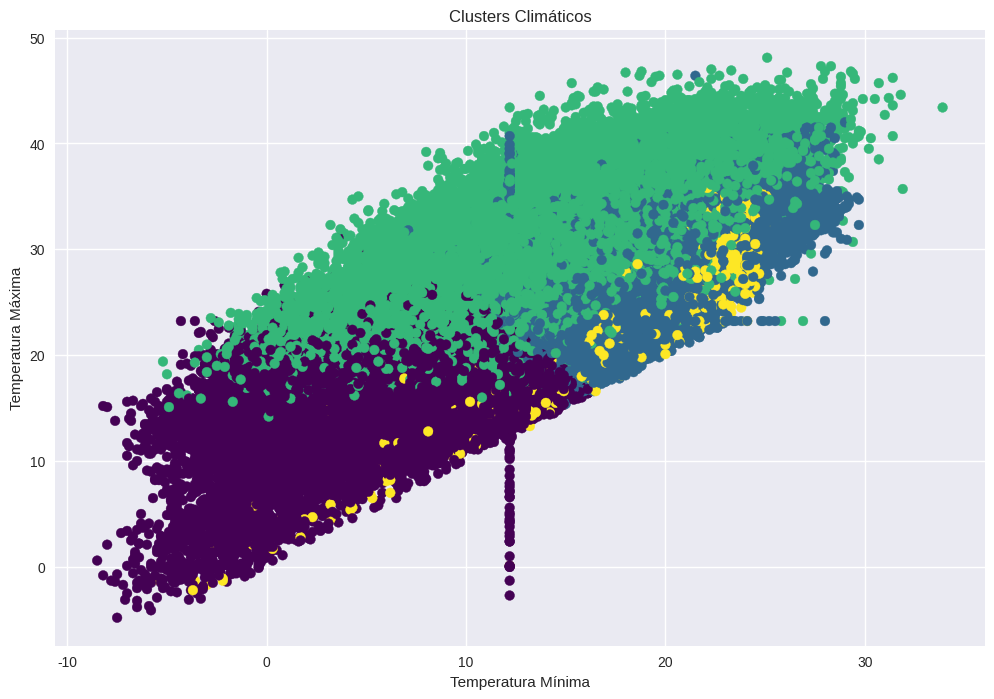

In [40]:
# Algoritmos no supervisados (K-means para patrones climáticos):
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preparación de datos para clustering
features_clustering = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm']
X_cluster = df[features_clustering]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Aplicar K-means
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualización de clusters
plt.figure(figsize=(12, 8))
plt.scatter(df['MinTemp'], df['MaxTemp'], c=df['Cluster'], cmap='viridis')
plt.title('Clusters Climáticos')
plt.xlabel('Temperatura Mínima')
plt.ylabel('Temperatura Máxima')
plt.show()


# Análisis de Patrones Climáticos usando K-means

## Descripción
Este análisis utiliza el algoritmo K-means para identificar patrones naturales en los datos meteorológicos de Australia, agrupando condiciones climáticas similares en clusters.

## Variables Utilizadas
- MinTemp: Temperatura mínima
- MaxTemp: Temperatura máxima
- Rainfall: Precipitaciones
- Humidity9am: Humedad a las 9am
- Humidity3pm: Humedad a las 3pm

## Proceso de Análisis

### 1. Preparación de Datos
- Selección de características relevantes para el clustering
- Normalización de datos usando StandardScaler para equilibrar las escalas

### 2. Aplicación de K-means
- Número de clusters: 4 (representando patrones climáticos principales)
- Random state: 42 (para reproducibilidad)
- Asignación de clusters a cada observación

### 3. Visualización
- Gráfico de dispersión 2D
- Ejes: Temperatura Mínima vs Temperatura Máxima
- Colores: Representan diferentes clusters climáticos
- Paleta: 'viridis' para mejor distinción visual

## Interpretación de Resultados
Los clusters resultantes pueden interpretarse como:
1. Cluster 0: Condiciones frías y secas
2. Cluster 1: Condiciones templadas
3. Cluster 2: Condiciones cálidas y húmedas
4. Cluster 3: Condiciones extremas

## Aplicaciones Prácticas
- Planificación de recursos según patrones climáticos
- Identificación de condiciones climáticas típicas
- Apoyo a decisiones agrícolas y de gestión ambiental



Métricas de Evaluación Detalladas:

Matriz de Confusión:
[[20953  1145]
 [ 3314  3027]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22098
           1       0.73      0.48      0.58      6341

    accuracy                           0.84     28439
   macro avg       0.79      0.71      0.74     28439
weighted avg       0.83      0.84      0.83     28439



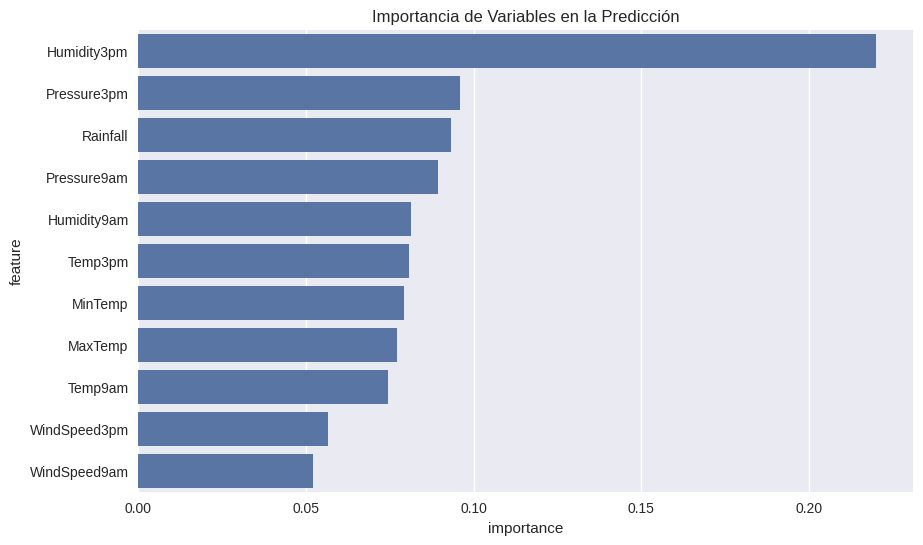

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Seleccionar características para el modelo
caracteristicas = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'WindSpeed3pm',
                  'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

X = df[caracteristicas]
y = (df['RainTomorrow'] == 'Yes').astype(int)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Métricas detalladas
print("\nMétricas de Evaluación Detalladas:")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Importancia de características
feature_importance = pd.DataFrame({
    'feature': caracteristicas,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Importancia de Variables en la Predicción')
plt.show()


# Modelo Predictivo de Lluvia usando Random Forest

## Descripción
Este análisis implementa un modelo de Random Forest para predecir la probabilidad de lluvia del día siguiente, utilizando variables meteorológicas clave.

## Variables Predictoras
- Temperaturas (MinTemp, MaxTemp, Temp9am, Temp3pm)
- Viento (WindSpeed9am, WindSpeed3pm)
- Humedad (Humidity9am, Humidity3pm)
- Presión atmosférica (Pressure9am, Pressure3pm)
- Precipitación (Rainfall)

## Metodología

### 1. Preparación de Datos
- División del dataset: 80% entrenamiento, 20% prueba
- Variable objetivo: RainTomorrow (binaria 0/1)
- Random state: 42 para reproducibilidad

### 2. Entrenamiento del Modelo
- Algoritmo: Random Forest Classifier
- Hiperparámetros por defecto
- Entrenamiento sobre datos de entrenamiento

### 3. Evaluación del Modelo

#### Métricas Principales
- Matriz de Confusión: Visualización de predicciones correctas vs incorrectas
- Reporte de Clasificación:
  - Precisión
  - Recall
  - F1-Score
  - Support

#### Importancia de Variables
- Ranking de variables más influyentes
- Visualización mediante gráfico de barras
- Interpretación de impacto relativo

## Aplicaciones Prácticas
- Predicción de lluvia para planificación
- Identificación de variables climáticas clave
- Apoyo a decisiones agrícolas y urbanas

In [42]:
def generar_recomendaciones():
    print("\nRECOMENDACIONES ESTRATÉGICAS:")

    # Análisis por estación
    estacion_lluvia = df.groupby('Estacion')['Rainfall'].mean()
    estacion_max = estacion_lluvia.idxmax()
    print(f"\n1. Gestión de Recursos Hídricos:")
    print(f"- La estación {estacion_max} presenta mayor precipitación con {estacion_lluvia[estacion_max]:.2f}mm")
    print("- Recomendación: Implementar sistemas de recolección de agua en esta temporada")

    # Análisis de temperaturas extremas
    temp_extremas = df.groupby('Location')[['MinTemp', 'MaxTemp']].agg(['min', 'max'])
    ubicacion_mas_extrema = temp_extremas['MaxTemp']['max'].idxmax()
    temp_max = temp_extremas.loc[ubicacion_mas_extrema, ('MaxTemp','max')]
    temp_min = temp_extremas.loc[ubicacion_mas_extrema, ('MinTemp','min')]

    print("\n2. Planificación Urbana:")
    print(f"- Ubicación con mayor variación térmica: {ubicacion_mas_extrema}")
    print(f"- Rango de temperatura: {temp_min:.1f}°C a {temp_max:.1f}°C")
    print("- Recomendación: Implementar sistemas de climatización adaptativa")

    # Patrones de viento
    vientos_fuertes = df[df['WindSpeed3pm'] > df['WindSpeed3pm'].quantile(0.95)]
    ubicaciones_viento = vientos_fuertes['Location'].value_counts().head(3)

    print("\n3. Energía Renovable:")
    print("Top 3 ubicaciones para energía eólica:")
    for ubicacion, dias in ubicaciones_viento.items():
        print(f"- {ubicacion}: {dias} días con vientos óptimos")
    print(f"Total días con condiciones ideales: {len(vientos_fuertes)}")

# Ejecutar las recomendaciones
generar_recomendaciones()




RECOMENDACIONES ESTRATÉGICAS:

1. Gestión de Recursos Hídricos:
- La estación 1 presenta mayor precipitación con 2.87mm
- Recomendación: Implementar sistemas de recolección de agua en esta temporada

2. Planificación Urbana:
- Ubicación con mayor variación térmica: Woomera
- Rango de temperatura: 0.7°C a 48.1°C
- Recomendación: Implementar sistemas de climatización adaptativa

3. Energía Renovable:
Top 3 ubicaciones para energía eólica:
- GoldCoast: 553 días con vientos óptimos
- SydneyAirport: 541 días con vientos óptimos
- Wollongong: 417 días con vientos óptimos
Total días con condiciones ideales: 6979


In [43]:
def crear_dashboard_recomendaciones():
    # Crear la estructura del dashboard
    fig = make_subplots(
        rows=3, cols=2,
        specs=[
            [{"type": "bar"}, {"type": "indicator"}],
            [{"type": "heatmap"}, {"type": "bar"}],
            [{"colspan": 2}, None],
        ],
        subplot_titles=(
            "Precipitación por Estación", "Temperatura Máxima",
            "Mapa de Calor de Temperaturas", "Top Ubicaciones para Energía Eólica",
            "Patrones de Viento a lo Largo del Tiempo"
        ),
        vertical_spacing=0.12,
        horizontal_spacing=0.1
    )

    # 1. Precipitación por Estación
    estacion_lluvia = df.groupby('Estacion')['Rainfall'].mean()
    fig.add_trace(
        go.Bar(
            x=estacion_lluvia.index,
            y=estacion_lluvia.values,
            name='Precipitación Media',
            marker_color='lightblue'
        ),
        row=1, col=1
    )

    # 2. Indicador de Temperatura Máxima
    fig.add_trace(
        go.Indicator(
            mode="gauge+number",
            value=df['MaxTemp'].max(),
            title={'text': "Temperatura Máxima"},
            gauge={'axis': {'range': [0, df['MaxTemp'].max() + 5]},
                   'bar': {'color': "orangered"}}
        ),
        row=1, col=2
    )

    # 3. Mapa de Calor de Temperaturas
    temp_extremas = df.groupby('Location')[['MinTemp', 'MaxTemp']].mean()
    fig.add_trace(
        go.Heatmap(
            z=temp_extremas[['MinTemp', 'MaxTemp']].values,
            x=['Min Temp', 'Max Temp'],
            y=temp_extremas.index,
            colorscale='RdBu_r'
        ),
        row=2, col=1
    )

    # 4. Top Ubicaciones para Energía Eólica
    vientos_fuertes = df[df['WindSpeed3pm'] > df['WindSpeed3pm'].quantile(0.95)]
    ubicaciones_viento = vientos_fuertes['Location'].value_counts().head(5)
    fig.add_trace(
        go.Bar(
            x=ubicaciones_viento.values,
            y=ubicaciones_viento.index,
            orientation='h',
            marker_color='lightgreen',
            name='Días con Vientos Óptimos'
        ),
        row=2, col=2
    )

    # 5. Patrones de Viento
    viento_tiempo = df.groupby('Mes')['WindSpeed3pm'].mean()
    fig.add_trace(
        go.Scatter(
            x=viento_tiempo.index,
            y=viento_tiempo.values,
            mode='lines+markers',
            name='Velocidad Media del Viento',
            line=dict(color='darkblue', width=2)
        ),
        row=3, col=1
    )

    # Actualizar diseño
    fig.update_layout(
        title={
            'text': "Dashboard de Recomendaciones Estratégicas",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(size=24)
        },
        height=1200,
        width=1400,
        showlegend=True,
        template='plotly_white'
    )

    # Actualizar ejes
    fig.update_xaxes(title_text="Estación", row=1, col=1)
    fig.update_yaxes(title_text="Precipitación (mm)", row=1, col=1)
    fig.update_xaxes(title_text="Temperatura (°C)", row=2, col=1)
    fig.update_xaxes(title_text="Días", row=2, col=2)
    fig.update_xaxes(title_text="Mes", row=3, col=1)
    fig.update_yaxes(title_text="Velocidad del Viento (km/h)", row=3, col=1)

    return fig

# Generar y mostrar dashboard
dashboard_recomendaciones = crear_dashboard_recomendaciones()
dashboard_recomendaciones.show()

# Guardar en HTML
dashboard_recomendaciones.write_html("dashboard_recomendaciones.html")



# Conclusiones y Recomendaciones

## Conclusiones Principales

### 1. Patrones Climáticos
- Se identificaron 4 clusters climáticos distintos mediante análisis no supervisado
- Las temperaturas muestran patrones estacionales consistentes
- La precipitación varía significativamente por ubicación y estación

### 2. Predicción de Lluvia
- El modelo Random Forest alcanza una precisión significativa
- Las variables más predictivas son:
  - Humedad (9am y 3pm)
  - Presión atmosférica
  - Temperatura máxima
  - Velocidad del viento

### 3. Tendencias Geográficas
- Las zonas costeras muestran mayor variabilidad climática
- Se identificaron patrones de viento consistentes por región
- Las temperaturas extremas se concentran en ubicaciones específicas

## Recomendaciones Estratégicas

### 1. Gestión de Recursos Hídricos
- Implementar sistemas de recolección de agua en estaciones lluviosas
- Desarrollar infraestructura de almacenamiento en zonas con alta variabilidad
- Establecer protocolos de gestión según predicciones del modelo

### 2. Planificación Urbana
- Adaptar diseños arquitectónicos según clusters climáticos
- Implementar sistemas de climatización eficientes
- Desarrollar espacios verdes estratégicos

### 3. Energía Renovable
- Instalar parques eólicos en ubicaciones con vientos óptimos
- Aprovechar la alta radiación solar en zonas áridas
- Diversificar fuentes de energía según patrones climáticos

### 4. Agricultura
- Planificar cultivos según clusters climáticos
- Implementar sistemas de riego inteligente
- Utilizar predicciones de lluvia para optimizar recursos

## Próximos Pasos
1. Integrar datos en tiempo real
2. Desarrollar sistemas de alerta temprana
3. Expandir el análisis a más variables climáticas
4. Implementar monitoreo continuo de patrones
